In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

sns.set()
%matplotlib inline

Text(0.5,1,'Test Data')

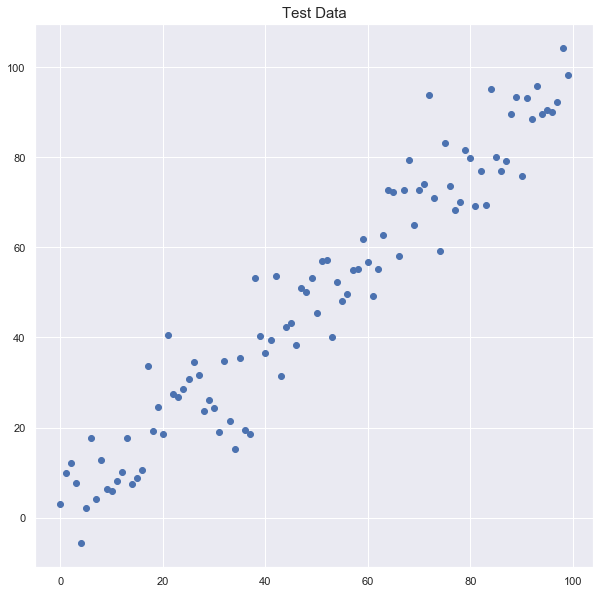

In [4]:
# Generate data
data_points = 100
dispersion = np.random.randint(low = 5, high = 20)

x_test = np.arange(data_points)
y_test = dispersion * np.random.randn(data_points) + x_test 

plt.figure(figsize = (10,10))
plt.scatter(x_test,y_test)
plt.title("Test Data", fontsize = 15)

In [5]:
# Error Function for Line of Best Fit
def error_sum(x, y, slope, intercept):
        return sum((y - slope*x - intercept)**2)

In [6]:
def guess_line(slope, intercept):
    x = np.arange(100)
    y = x * slope + intercept
    plt.figure(figsize= (10,10))
    plt.ylim([-20,200])
    plt.xlim([-5,100])
    plt.text(10, 85, s = "y = {} * x + {}".format(slope,intercept), fontsize = 15)
    plt.text(10, 75, s = "error = {:.2f}".format(error_sum(x_test,y_test, slope,intercept)), fontsize = 15)
    plt.title("Line of Best Fit Visualization", fontsize = 15)
    plt.plot(x,y, 'r')
    plt.scatter(x_test,y_test)
    
    plt.show()

interact(guess_line, slope = (0,2,0.1), intercept  = (0,20))

interactive(children=(FloatSlider(value=1.0, description='slope', max=2.0), IntSlider(value=10, description='i…

<function __main__.guess_line(slope, intercept)>

In [7]:
## Find optimal values using gradient descent
n = len(x_test)

#Number dependent on learning rate
epochs = 10

#Very sensitive to this number - anything larger and it will not converge
learning_rate = 0.0001

#Set initial values
m_guess = 0
b_guess = 0

#Store values
guesses = np.zeros((10,2))


for x in range(epochs):
    y_new = (m_guess * x_test) + b_guess
    
    # Take derivative of loss function with respect to slope and intercept
    m_grad = -2/n *  sum(x_test * (y_test - y_new))
    b_grad = -2/n * sum (y_test - y_new)
    
    #Update guess of slope and intercept
    m_guess -= (learning_rate * m_grad)
    b_guess -= (learning_rate * b_grad)
    
    #Store iterated values of slope and intercept (only need for next visualization)
    guesses[x] = [m_guess, b_guess]
 

Text(0.5,1,'Gradient Decent')

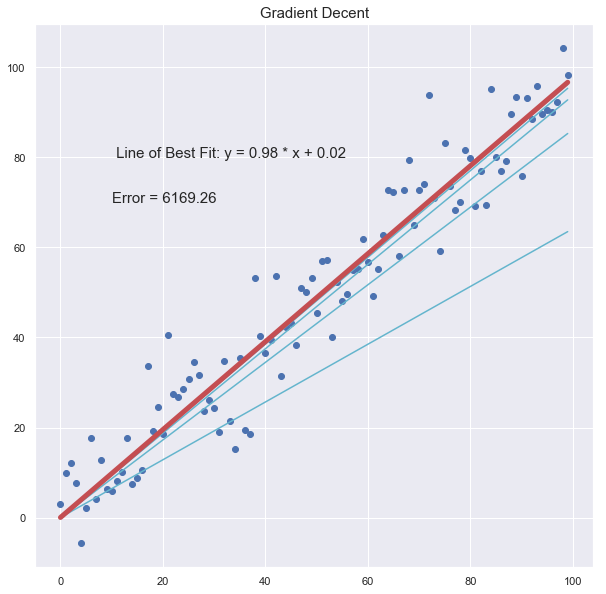

In [8]:
#Plot Iterations
plt.figure(figsize= (10,10))
plt.scatter(x_test,y_test)
for i in range(len(guesses)-1):
    plt.plot(x_test* guesses[i][0] + guesses[i][1], 'c')

#Show Best Line
plt.plot(x_test* guesses[-1][0] + guesses[-1][1], 'r', linewidth = 5)

best_m = guesses[-1][0]
best_b = guesses[-1][1]
plt.text(10, 80, s = " Line of Best Fit: y = {:.2f} * x + {:.2f}".format(best_m, best_b ), fontsize = 15)
plt.text(10, 70, s = "Error = {:.2f}".format(error_sum(x_test,y_test, best_m, best_b)), fontsize = 15)
plt.title("Gradient Decent", fontsize = 15)